# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = (f"{url}{city}&appid={weather_api_key}&units=metric")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except (ValueError, KeyError):
        print("City not found. Skipping...")
        pass
    time.sleep(1)          
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kyzylorda
City not found. Skipping...
Processing Record 2 of Set 1 | bangjun
Processing Record 3 of Set 1 | atafu village
Processing Record 4 of Set 1 | fale old settlement
City not found. Skipping...
Processing Record 5 of Set 1 | codrington
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 8 of Set 1 | tsiombe
City not found. Skipping...
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | demerval lobao
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | corinto
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | bamboo flat
Processing Record 18 of Set 1 | hovd
Processing Record 19 of Set 1 | college
Processing Record

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          516
Lat           516
Lng           516
Max Temp      516
Humidity      516
Cloudiness    516
Wind Speed    516
Country       516
Date          516
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bangjun,39.9911,117.2628,13.91,70,55,1.93,CN,1698776983
1,atafu village,-8.5421,-172.5159,28.42,76,84,7.27,TK,1698776990
2,codrington,-38.2667,141.9667,9.50,76,92,2.92,AU,1698777000
3,grytviken,-54.2811,-36.5092,3.79,92,94,0.34,GS,1698776430
4,haiku-pauwela,20.9219,-156.3051,25.09,79,20,0.45,US,1698776443


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangjun,39.9911,117.2628,13.91,70,55,1.93,CN,1698776983
1,atafu village,-8.5421,-172.5159,28.42,76,84,7.27,TK,1698776990
2,codrington,-38.2667,141.9667,9.50,76,92,2.92,AU,1698777000
3,grytviken,-54.2811,-36.5092,3.79,92,94,0.34,GS,1698776430
4,haiku-pauwela,20.9219,-156.3051,25.09,79,20,0.45,US,1698776443


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

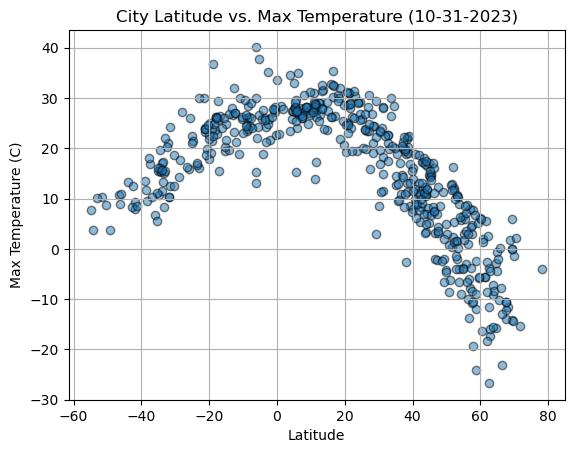

In [27]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", alpha=0.5, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (10-31-2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

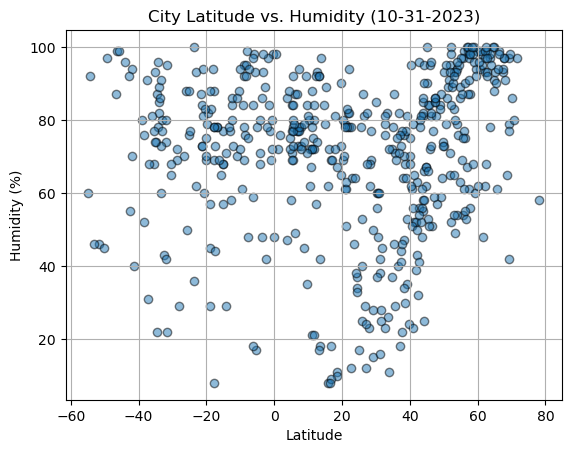

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", alpha=0.5, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (10-31-2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

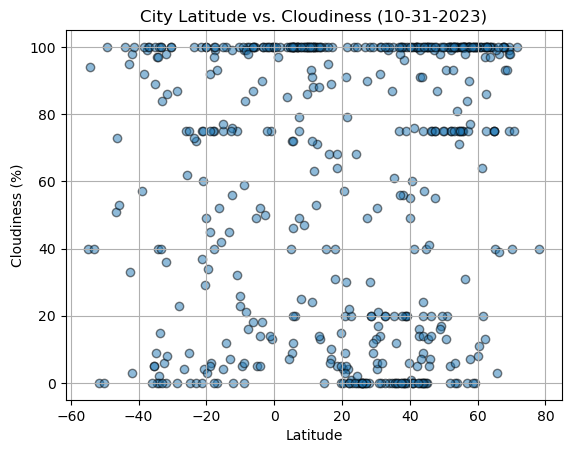

In [29]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", alpha=0.5, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (10-31-2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

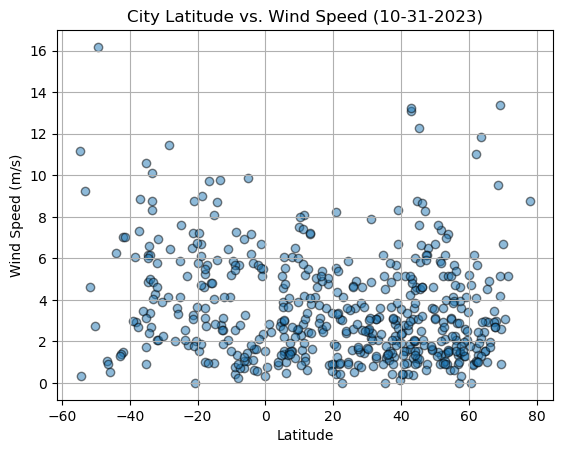

In [26]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", alpha=0.5, edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (10-31-2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [48]:
# Define a function to create Linear Regression plots
def linReg(x, y):
    (slope, intercept, rval, pval, stderr) = linregress(x, y)
    return ((slope * x) + intercept, rval * rval, f"y = {'%.2f' % slope}x + {'%.2f' % intercept}")

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bangjun,39.9911,117.2628,13.91,70,55,1.93,CN,1698776983
4,haiku-pauwela,20.9219,-156.3051,25.09,79,20,0.45,US,1698776443
7,corinto,37.9407,22.9573,18.83,64,56,1.27,GR,1698776458
9,tiksi,71.6872,128.8694,-15.26,97,100,5.14,RU,1698776977
10,bilibino,68.0546,166.4372,-11.65,91,93,2.96,RU,1698776473


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,28.42,76,84,7.27,TK,1698776990
2,codrington,-38.2667,141.9667,9.50,76,92,2.92,AU,1698777000
3,grytviken,-54.2811,-36.5092,3.79,92,94,0.34,GS,1698776430
5,demerval lobao,-5.3583,-42.6764,37.67,17,49,1.06,BR,1698776448
6,avarua,-21.2078,-159.7750,24.03,73,75,7.20,CK,1698776453


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is 0.769528176673358


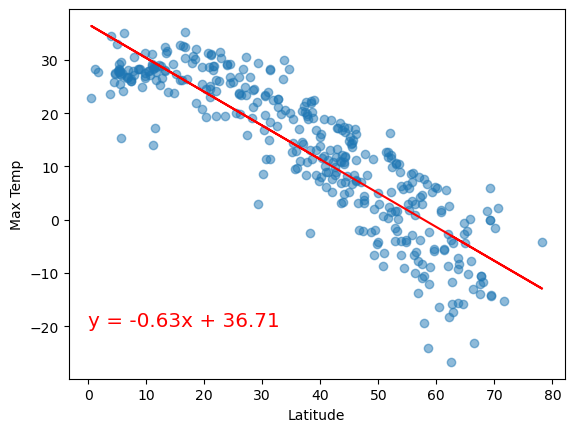

In [60]:
# Linear regression on Northern Hemisphere
(plot, rr, eqn) = linReg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], alpha=0.5)
plt.plot(northern_hemi_df["Lat"], plot, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.text(0, -20, eqn, color='r', fontsize='x-large')
print(f"The r^2 value is {rr}")
plt.show()

The r^2 value is 0.6224978201595668


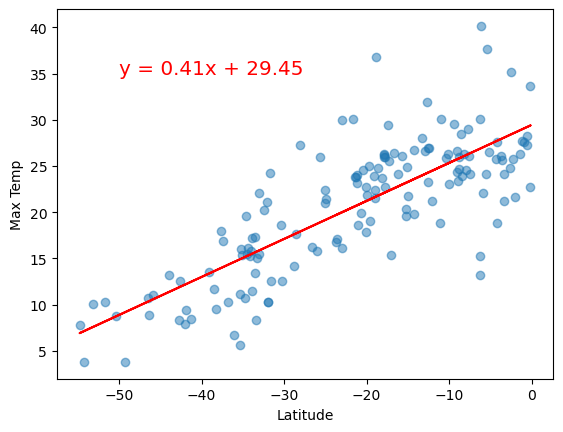

In [61]:
# Linear regression on Southern Hemisphere
(plot, rr, eqn) = linReg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], alpha=0.5)
plt.plot(southern_hemi_df["Lat"], plot, color='r')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.text(-50, 35, eqn, color='r', fontsize='x-large')
print(f"The r^2 value is {rr}")
plt.show()

**Discussion about the linear relationship:** The relationship between temperature and latitude for both hemispheres is fairly strong as shown by the r^2 value of each being between 0.6 and 0.8. Although, given that the maximum value for r^2 is 1.0, there is likely another factor that can influence the temperature other than latitude.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is 0.08537847774972834


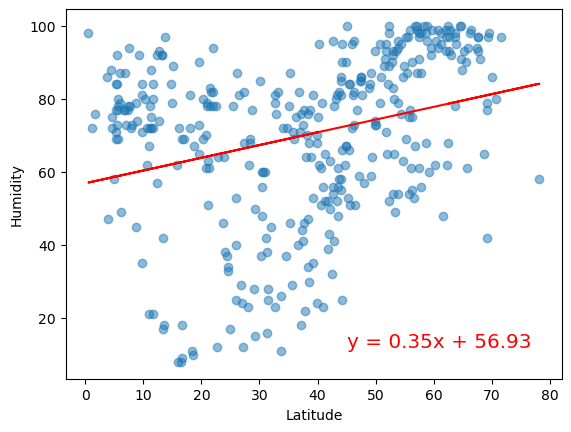

In [62]:
# Northern Hemisphere
(plot, rr, eqn) = linReg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], alpha=0.5)
plt.plot(northern_hemi_df["Lat"], plot, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(45, 12, eqn, color='r', fontsize='x-large')
print(f"The r^2 value is {rr}")
plt.show()

The r^2 value is 0.003782585505729368


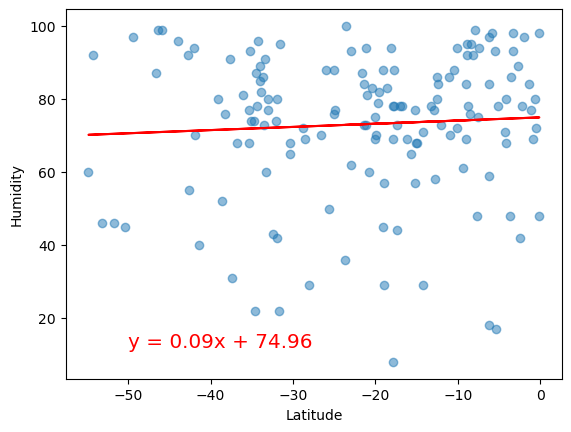

In [63]:
# Southern Hemisphere
(plot, rr, eqn) = linReg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], alpha=0.5)
plt.plot(southern_hemi_df["Lat"], plot, color='r')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.text(-50, 12, eqn, color='r', fontsize='x-large')
print(f"The r^2 value is {rr}")
plt.show()

**Discussion about the linear relationship:** The r^2 values for the relationship between humidity and latitude are both less than 0.1. There is almost no linear corellation between the two values.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is 0.015014832465437226


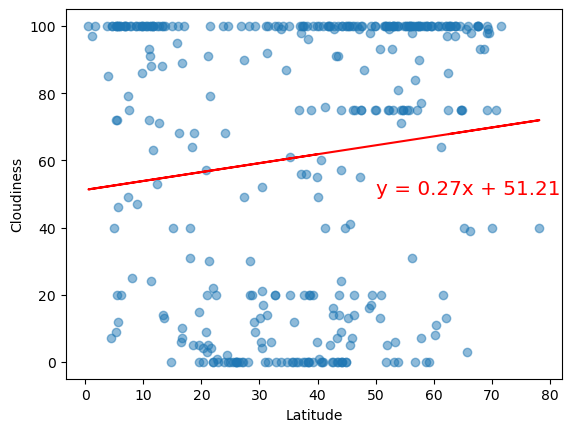

In [65]:
# Northern Hemisphere
(plot, rr, eqn) = linReg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], alpha=0.5)
plt.plot(northern_hemi_df["Lat"], plot, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(50, 50, eqn, color='r', fontsize='x-large')
print(f"The r^2 value is {rr}")
plt.show()

The r^2 value is 0.005853896676256395


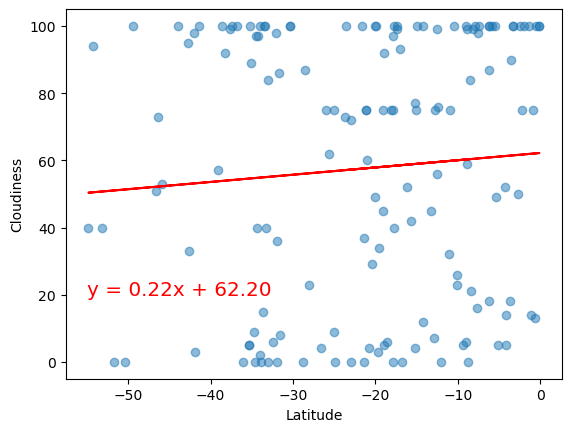

In [67]:
# Southern Hemisphere
(plot, rr, eqn) = linReg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], alpha=0.5)
plt.plot(southern_hemi_df["Lat"], plot, color='r')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.text(-55, 20, eqn, color='r', fontsize='x-large')
print(f"The r^2 value is {rr}")
plt.show()

**Discussion about the linear relationship:** The r^2 values for the relationship between cloudiness and latitude are both less than 0.1. There is almost no linear corellation between the two values.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is 0.002503600804204443


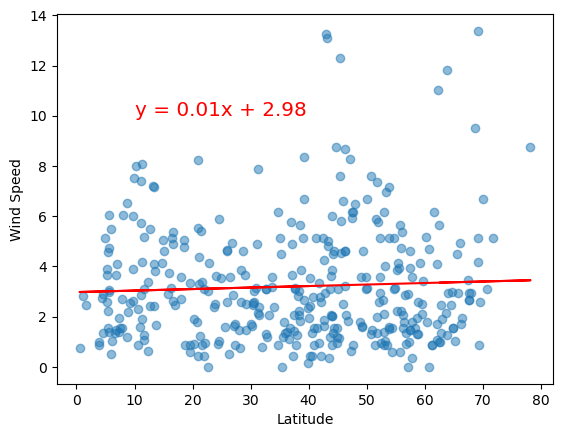

In [69]:
# Northern Hemisphere
(plot, rr, eqn) = linReg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], alpha=0.5)
plt.plot(northern_hemi_df["Lat"], plot, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(10, 10, eqn, color='r', fontsize='x-large')
print(f"The r^2 value is {rr}")
plt.show()

The r^2 value is 0.04427202985986445


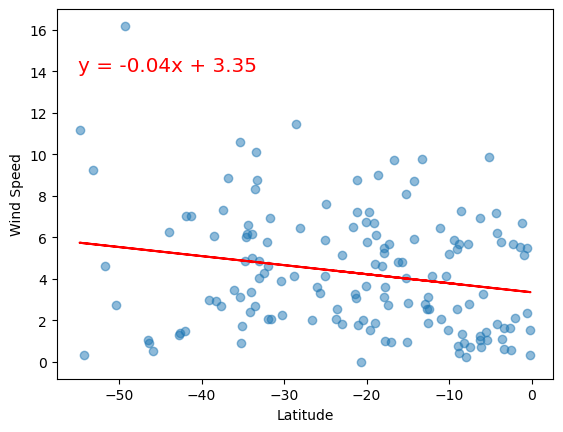

In [71]:
# Southern Hemisphere
(plot, rr, eqn) = linReg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], alpha=0.5)
plt.plot(southern_hemi_df["Lat"], plot, color='r')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.text(-55, 14, eqn, color='r', fontsize='x-large')
print(f"The r^2 value is {rr}")
plt.show()

**Discussion about the linear relationship:** The r^2 values for the relationship between wind speed and latitude are both less than 0.1. There is almost no linear corellation between the two values.